In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np

# --- Define PSNR metric ---
def psnr_metric(y_true, y_pred):
    return tf.image.psnr(y_true, y_pred, max_val=1.0)

# --- Build SRCNN model for color images ---
def build_srcnn(input_shape=(33, 33, 3)):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (9, 9), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(32, (1, 1), activation='relu', padding='same')(x)
    outputs = layers.Conv2D(3, (5, 5), activation='linear', padding='same')(x)
    model = models.Model(inputs, outputs)
    return model

# --- Create and compile model ---
srcnn = build_srcnn((33, 33, 3))
srcnn.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='mse',
              metrics=[psnr_metric])

srcnn.summary()

# --- Dummy data for demo (replace with your training data) ---
x_train = np.random.rand(100, 33, 33, 3).astype(np.float32)
y_train = np.random.rand(100, 33, 33, 3).astype(np.float32)

# --- Train ---
srcnn.fit(x_train, y_train, epochs=2, batch_size=8)

# --- Save trained model ---
srcnn.save("srcnn_color.h5")

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 33, 33, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 33, 33, 64)     │        15,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 33, 33, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 33, 33, 3)      │         2,403 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,099 (78.51 KB)

 Trainable params: 20,099 (78.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 0.2990 - psnr_metric: 5.3526
Epoch 2/2
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - loss: 0.1238 - psnr_metric: 9.0968


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


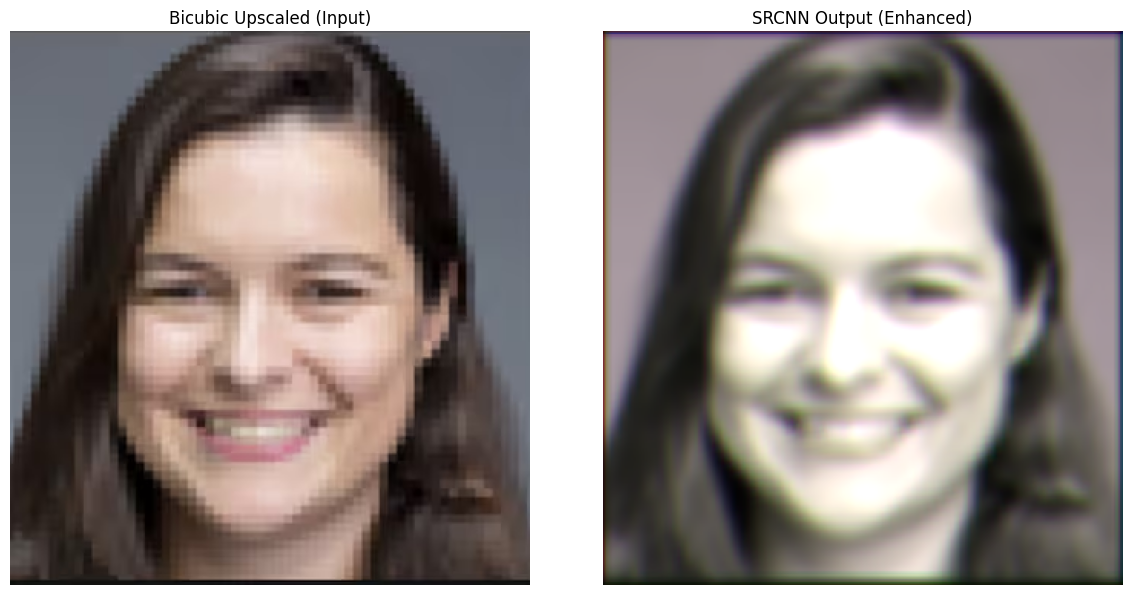

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# --- Define SRCNN model ---
def build_srcnn(input_shape=(None, None, 3)):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (9, 9), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(32, (1, 1), activation='relu', padding='same')(x)
    outputs = layers.Conv2D(3, (5, 5), activation='linear', padding='same')(x)
    model = models.Model(inputs, outputs)
    return model

# --- Load trained model ---
model = build_srcnn()
model.load_weights("/content/srcnn_color.h5")  # or the path where you saved it

# --- Load and preprocess image ---
img = cv2.imread("/content/test_lr1.png")
if img is None:
    raise FileNotFoundError("Image not found!")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



# Normalize and prepare for model
input_img = img.astype(np.float32) / 255.0
input_img = np.expand_dims(input_img, axis=0)

# --- Predict super-resolution image ---
pred = model.predict(input_img)[0]
pred = np.clip(pred, 0, 1)
output = (pred * 255).astype(np.uint8)

# --- Display Input vs Output ---
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(upscaled)
plt.title("Bicubic Upscaled (Input)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(output)
plt.title("SRCNN Output (Enhanced)")
plt.axis("off")

plt.tight_layout()
plt.show()